In [ ]:
!pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184505 sha256=1d752e68b37aa638f44a695d2d6c32ef9732d013dbfcb2f576983d6b2437ad79
  Stored in directory: /root/.cache/pip/wheels/32/b8/b2/c4c2b95765e615fe139b0b17b5ea7c0e1b6519b0a9ec8fb34d
Successfully built python-docx


# Homework Description

In [ ]:
import docx
file_name = 'OD_Homework.docx'
doc = docx.Document(file_name)

fullText = []
for para in doc.paragraphs:
    fullText.append(para.text)

for line in fullText:
  print(line)

Dataset:
https://drive.google.com/file/d/1iNwpwoIdyXJzzq16WhAG_nXp9Gdd7ZSJ/view?usp=sharing
Dataset description:
 

Evaluation criteria (100% in total):
EDA/ data preparation  (15%)
Feature engineering (+non-linear transformations) (15%)
Mahalanobis rule  (5%)
Supervised models (15% max)
SVM (5%)
Logreg (5%)
KNN (5%)
Unsupervised models (with tuning hyperparams) (20% max):
One-class SVM  (10%)
Isolation Forest (10%)
Choose metrics and explain the choice. Compare different models and select the best (separately for supervised and unsupervised approaches)  (10%)
General points (20% max)
Code quality: no duplicated blocks, readable variables, etc  (5%)
Visualization (5%)
Analysis and comments (10%)




In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# EDA

In [ ]:
df = pd.read_csv('Cardiotocography.csv')
df.head()

,id,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,outlier
0,1881.0,0.592593,0.000000,0.000000,0.294118,0.633803,0.338235,0.000000,0.013807,0.500000,...,0.045872,0.336207,0.333333,0.1,0.485149,0.247423,0.284091,0.638418,1.0,b'yes'
1,421.0,0.574074,0.038462,0.000000,0.000000,0.816901,0.029412,0.527473,0.092702,0.000000,...,0.770642,0.672414,0.166667,0.0,0.534653,0.587629,0.511364,0.016949,0.0,b'yes'
2,92.0,0.777778,0.000000,0.000000,0.000000,0.774648,0.029412,0.736264,0.096647,0.000000,...,0.816514,0.275862,0.222222,0.0,0.633663,0.659794,0.602273,0.000000,1.0,b'yes'
3,1767.0,0.259259,0.000000,0.000000,0.294118,0.704225,0.191176,0.000000,0.183432,0.428571,...,0.174312,0.275862,0.222222,0.1,0.000000,0.164948,0.000000,0.361582,0.0,b'yes'
4,1880.0,0.592593,0.000000,0.001773,0.294118,0.633803,0.352941,0.000000,0.013807,0.428571,...,0.045872,0.336207,0.333333,0.1,0.485149,0.226804,0.272727,0.683616,1.0,b'yes'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16880 entries, 0 to 16879
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        16880 non-null  float64
 1   LB        16880 non-null  float64
 2   AC        16880 non-null  float64
 3   FM        16880 non-null  float64
 4   UC        16880 non-null  float64
 5   ASTV      16880 non-null  float64
 6   MSTV      16880 non-null  float64
 7   ALTV      16880 non-null  float64
 8   MLTV      16880 non-null  float64
 9   DL        16880 non-null  float64
 10  DS        16880 non-null  float64
 11  DP        16880 non-null  float64
 12  Width     16880 non-null  float64
 13  Min       16880 non-null  float64
 14  Max       16880 non-null  float64
 15  Nmax      16880 non-null  float64
 16  Nzeros    16880 non-null  float64
 17  Mode      16880 non-null  float64
 18  Mean      16880 non-null  float64
 19  Median    16880 non-null  float64
 20  Variance  16880 non-null  fl

In [ ]:
df.describe()

,id,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
count,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,...,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000
mean,1123.872156,0.483186,0.129270,0.011411,0.226668,0.425672,0.179521,0.064739,0.170819,0.113227,...,0.391083,0.379411,0.365604,0.230579,0.033365,0.563887,0.525497,0.475086,0.090984,0.670794
std,593.610901,0.175738,0.143077,0.060514,0.156665,0.216970,0.121198,0.146732,0.114551,0.171935,...,0.214992,0.252147,0.153285,0.159211,0.069209,0.128429,0.136375,0.146790,0.119737,0.295171
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,641.000000,0.351852,0.000000,0.000000,0.117647,0.236111,0.088235,0.000000,0.094675,0.000000,...,0.204678,0.155963,0.258621,0.111111,0.000000,0.482143,0.431193,0.373494,0.015385,0.500000
50%,1150.500000,0.481481,0.076923,0.000000,0.235294,0.408451,0.161765,0.000000,0.155819,0.000000,...,0.377907,0.376147,0.353448,0.222222,0.000000,0.567797,0.525773,0.478261,0.045198,0.500000
75%,1619.000000,0.592593,0.192308,0.003546,0.304348,0.608108,0.220588,0.050633,0.226824,0.214286,...,0.549133,0.596330,0.456897,0.333333,0.000000,0.650000,0.621053,0.576087,0.122677,1.000000
max,2126.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The data is already scaled to range [0; 1]

In [ ]:
df.isna().sum()

id          0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
outlier     0
dtype: int64

In [ ]:
target = 'outlier'

features = list(df.columns)
features.remove(target)
features

['id',
 'LB',
 'AC',
 'FM',
 'UC',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'DL',
 'DS',
 'DP',
 'Width',
 'Min',
 'Max',
 'Nmax',
 'Nzeros',
 'Mode',
 'Mean',
 'Median',
 'Variance',
 'Tendency']

In [ ]:
df[target].value_counts()

b'no'     16550
b'yes'      330
Name: outlier, dtype: int64

Remove the 'b' and ' symbols from the target values.

In [ ]:
df = df.replace({"b'no'": 'no', "b'yes'": 'yes'})

In [ ]:
x_data = df[features]
y_data = df[target]

In [ ]:
print(y_data.value_counts())
print(f'{y_data.value_counts()[1] / y_data.value_counts()[0] * 100:.3f}% of the data are outliers')

no     16550
yes      330
Name: outlier, dtype: int64
1.994% of the data are outliers


<ipython-input-20-8a00bc3f6dc8>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


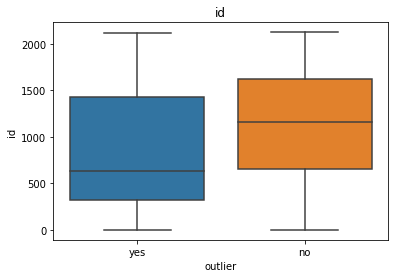

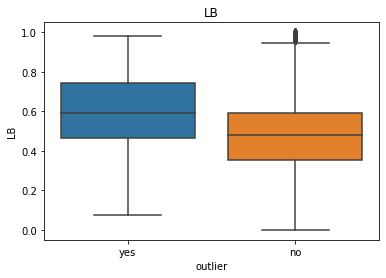

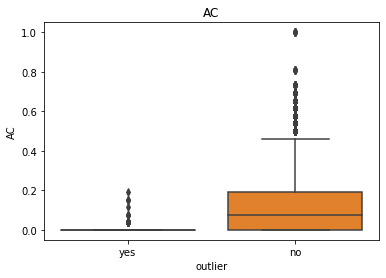

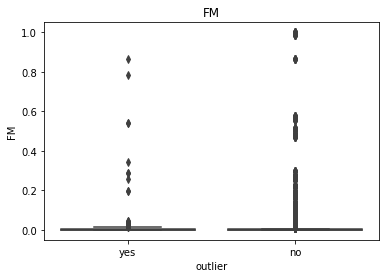

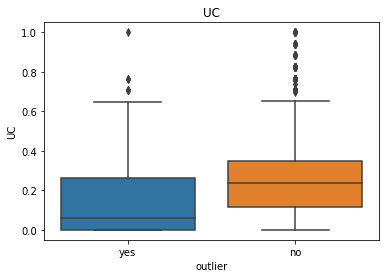

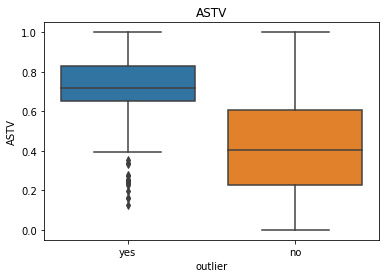

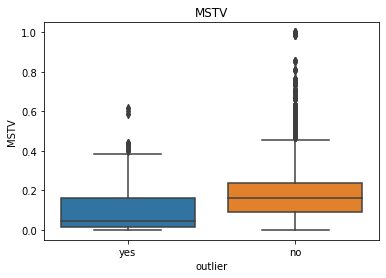

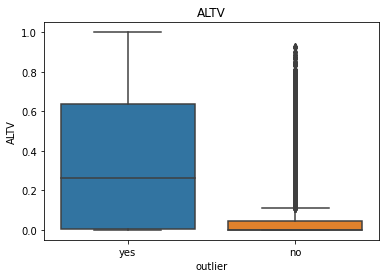

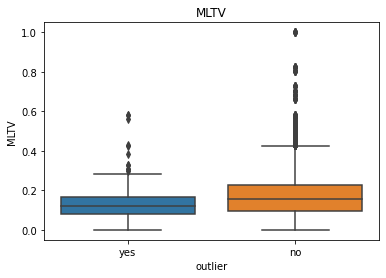

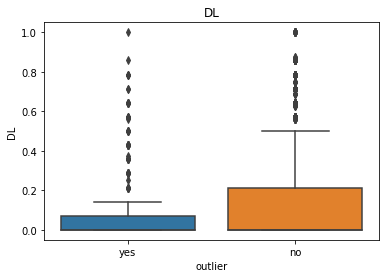

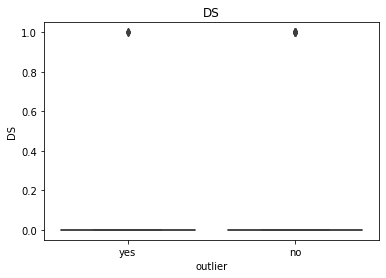

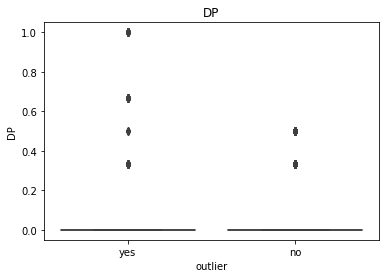

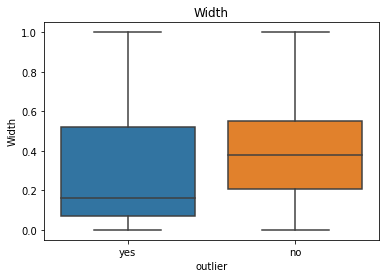

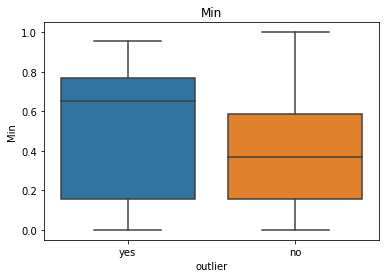

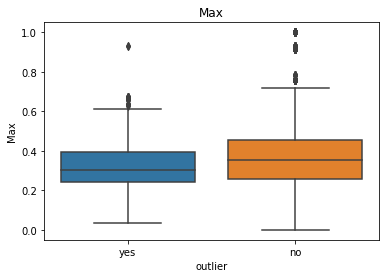

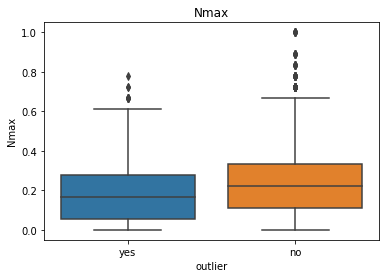

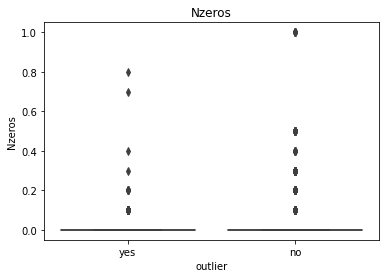

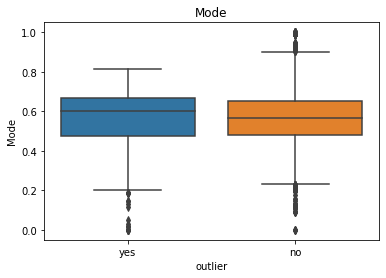

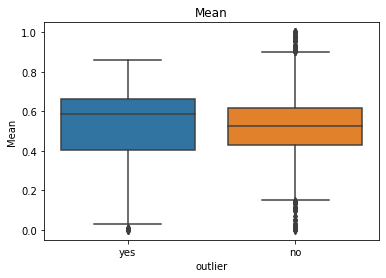

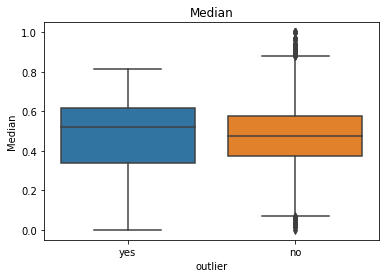

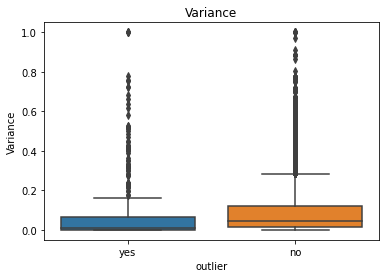

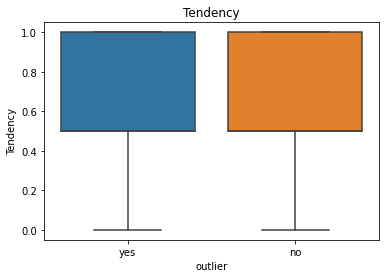

In [ ]:
for feature in features:
  plt.figure()
  sns.boxplot(y = feature, x = target, data = df)
  plt.title(feature)

As we can see, there is some feature which has not an usual boxplot. Dive into them deeper.

In [ ]:
def feature_by_target(data, feature, target):

  print('YES:\n', data[feature][data[target] == 'yes'].describe(), '\n')
  print('NO:\n', data[feature][data[target] == 'no'].describe())


**AC**

In [ ]:
feature_by_target(df, 'AC', target)

YES:
 count    330.000000
mean       0.007459
std        0.023382
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.192308
Name: AC, dtype: float64 

NO:
 count    16550.000000
mean         0.131699
std          0.143411
min          0.000000
25%          0.000000
50%          0.076923
75%          0.192308
max          1.000000
Name: AC, dtype: float64


For `AC`, when the target is 'yes', the values are most likely to be closer to zero.

In [ ]:
feature_by_target(df, 'FM', target)

YES:
 count    330.000000
mean       0.017199
std        0.083715
min        0.000000
25%        0.000000
50%        0.000000
75%        0.005319
max        0.867021
Name: FM, dtype: float64 

NO:
 count    16550.000000
mean         0.011296
std          0.059958
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003546
max          1.000000
Name: FM, dtype: float64


In [ ]:
feature_by_target(df, 'DS', target)

YES:
 count    330.000000
mean       0.009091
std        0.095056
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: DS, dtype: float64 

NO:
 count    16550.000000
mean         0.000604
std          0.024574
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DS, dtype: float64


It seems that there are some extreme values, of course, those will be the outliers.

In [ ]:
from scipy.spatial.distance import pdist, mahalanobis, squareform

In [ ]:
covariance_inverse = np.linalg.inv(np.cov(x_data.T))
x = x_data.iloc[0]
y = x_data.iloc[10]
left_part = np.dot(x - y, covariance_inverse)

distance = np.dot(left_part, (x - y).T)
np.sqrt(distance)

10.103328577999935

Let's encode the target feature, so we can measure correlation between the target and the features.

In [ ]:
df = df.replace({'yes': 1, 'no': 0})

<AxesSubplot:>

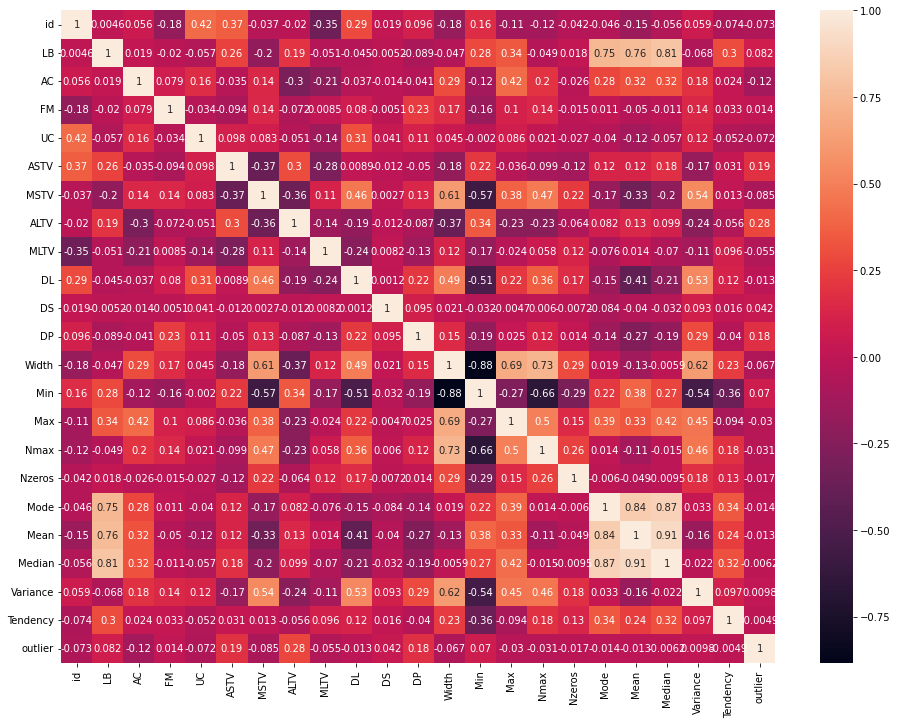

In [ ]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True)

For the outlier feature there is not much correlation betweent the other features.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def report(y_data, predictions, outlier_label = -1):
  predictions = predictions.copy()
  predictions[predictions != outlier_label] = 0
  predictions[predictions == outlier_label] = 1

  print(classification_report(y_data, predictions))

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
dim_reducer = PCA(n_components = 5)
x_reduced = dim_reducer.fit_transform(x_data)
x_reduced.shape

(16880, 5)

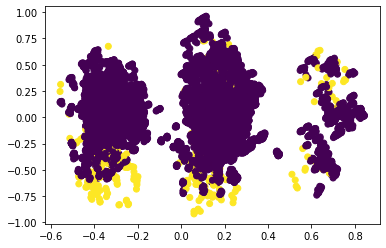

In [ ]:
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c = y_data)

# SVM

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
y_data = df['outlier']

In [ ]:
detector = OneClassSVM(nu=0.35)
svm_predictions = detector.fit_predict(x_data)

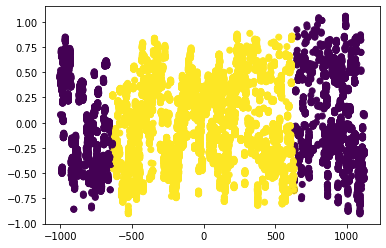

In [ ]:
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c = svm_predictions)

In [ ]:
report(y_data, svm_predictions)

              precision    recall  f1-score   support

           0       0.99      0.66      0.79     16550
           1       0.03      0.62      0.07       330

    accuracy                           0.65     16880
   macro avg       0.51      0.64      0.43     16880
weighted avg       0.97      0.65      0.77     16880



The F1 score for class_1 is pretty low. This is beacuse of the inbalance.

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x_data, y_data)

In [ ]:
detector = OneClassSVM(nu=0.6)
svm_predictions = detector.fit_predict(X_resampled)

In [ ]:
report(y_resampled, svm_predictions)

              precision    recall  f1-score   support

           0       0.61      0.49      0.54     16550
           1       0.57      0.69      0.62     16550

    accuracy                           0.59     33100
   macro avg       0.59      0.59      0.58     33100
weighted avg       0.59      0.59      0.58     33100



Now we have a better f1-score, but still not the best. If F1 score for class 1 is increasing, class 0 will decrease.

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      3294
           1       0.00      0.00      0.00      3326

    accuracy                           0.50      6620
   macro avg       0.25      0.50      0.33      6620
weighted avg       0.25      0.50      0.33      6620



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It predicted 0 class_1.

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      3294
           1       0.00      0.00      0.00      3326

    accuracy                           0.50      6620
   macro avg       0.25      0.50      0.33      6620
weighted avg       0.25      0.50      0.33      6620



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test.value_counts()

1    3326
0    3294
Name: outlier, dtype: int64

In [ ]:
y_train.value_counts()

0    13256
1    13224
Name: outlier, dtype: int64

Lets remove some features which has multiconlinearity

<AxesSubplot:>

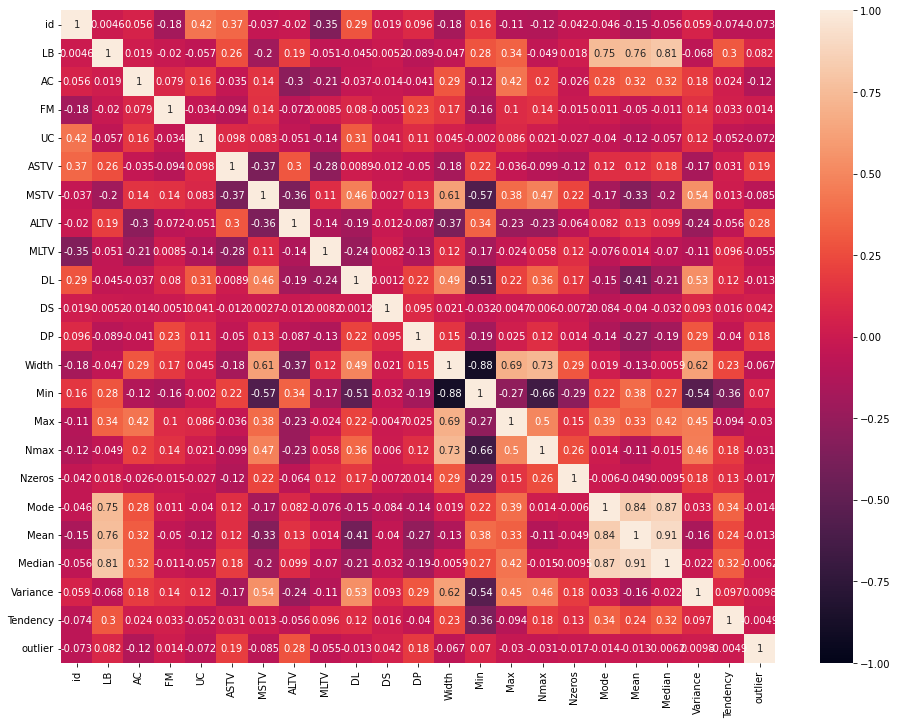

In [ ]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, vmin = -1)

In [ ]:
df_new = df

In [ ]:
df_new = df_new.drop(columns = ['id', 'Min', 'Mode', 'Median', 'Width'])

<AxesSubplot:>

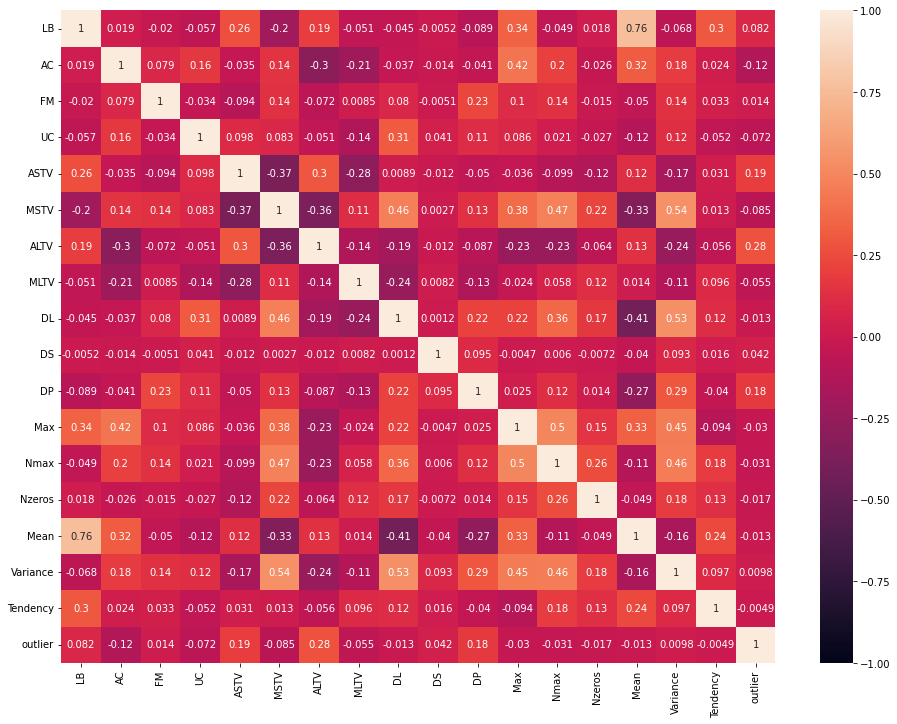

In [ ]:
plt.figure(figsize = (16, 12))
sns.heatmap(df_new.corr(), annot = True, vmin = -1)

In [ ]:
smote = SMOTE()

features = list(df_new.columns)
features.remove(target)

x_data_new = df_new[features]
y_data_new = df_new[target]

smote = SMOTE()
X_resampled_new, y_resampled_new = smote.fit_resample(x_data_new, y_data_new)

# OneClass SVM

In [ ]:
detector = OneClassSVM(nu=0.35)
svm_predictions = detector.fit_predict(X_resampled_new)

In [ ]:
report(y_resampled_new, svm_predictions)

              precision    recall  f1-score   support

           0       0.57      0.45      0.50     16550
           1       0.54      0.65      0.59     16550

    accuracy                           0.55     33100
   macro avg       0.55      0.55      0.55     33100
weighted avg       0.55      0.55      0.55     33100



In [ ]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)
y_pred = lr.predict(X_test_pca)

report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      3294
           1       0.00      0.00      0.00      3326

    accuracy                           0.50      6620
   macro avg       0.25      0.50      0.33      6620
weighted avg       0.25      0.50      0.33      6620



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I can't make logistic regression work, tried several ways.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)

y_pred = knn.predict(X_test_pca)

report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      3294
           1       0.00      0.00      0.00      3326

    accuracy                           0.50      6620
   macro avg       0.25      0.50      0.33      6620
weighted avg       0.25      0.50      0.33      6620



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
iso_for = IsolationForest(n_estimators = 200, max_samples = 'auto', contamination = 0.1, random_state = 42)
iso_for.fit(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, n_estimators=200, random_state=42)

In [ ]:
y_pred = iso_for.predict(X_test)
report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.52      0.93      0.66      3294
           1       0.66      0.13      0.22      3326

    accuracy                           0.53      6620
   macro avg       0.59      0.53      0.44      6620
weighted avg       0.59      0.53      0.44      6620



In [ ]:
iso_forest = IsolationForest()
iso_predictions = iso_forest.fit_predict(x_data)

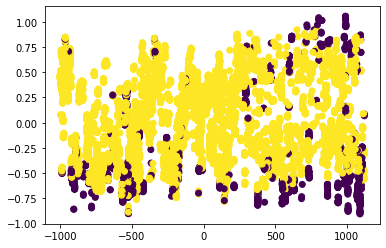

In [ ]:
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c = iso_predictions)

In [ ]:
report(y_data, iso_predictions)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     16550
           1       0.08      0.43      0.14       330

    accuracy                           0.89     16880
   macro avg       0.53      0.67      0.54     16880
weighted avg       0.97      0.89      0.93     16880



Due to lack of time I can't do much hyperparameter tuning, which would probably give me better results. I tried several basic models to detect the outliers, but the imbalance make it a difficult task.